# Lab 8
Name: AKSHAY KEKUDA

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


In [178]:
df = pd.read_csv("cluster_ds4.txt")

In [179]:
df.head()

,x,y,class
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2


In [180]:
df.isna().sum()

x        0
y        0
class    0
dtype: int64

In [181]:
df.dtypes

x        float64
y        float64
class      int64
dtype: object

In [182]:
df.shape

(788, 3)

In [183]:
df[df.duplicated()]

,x,y,class


From the above analysis we can see that the data does not have any missing values or duplicate records

## True Clusters

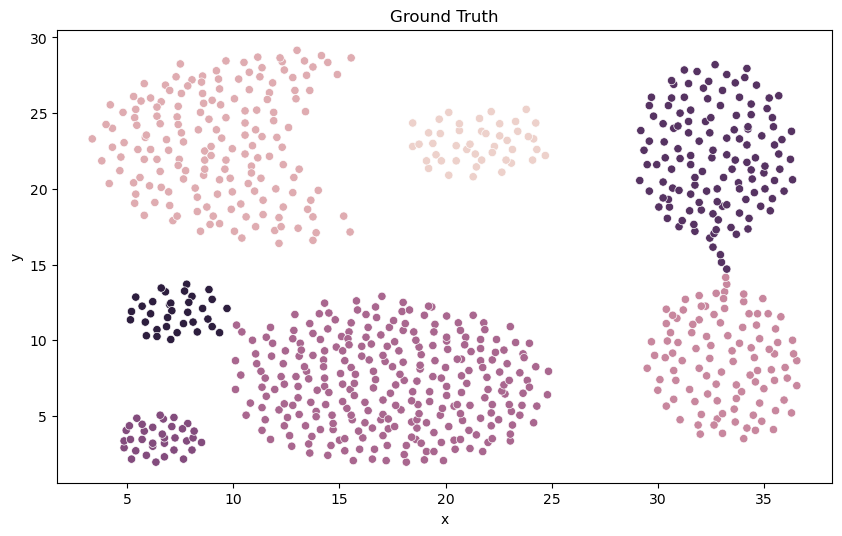

In [217]:
fig = plt.figure(figsize=(10,6), dpi=100)
# ax1 = fig.add_subplot(121)
ax1 = sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'class', legend=False)
ax1.set_title("Ground Truth")
plt.show()

## K-Means

In [185]:
K = 7
kmeans = KMeans(init='k-means++', n_clusters=K, n_init=10)
kmeans.fit(df[['x', 'y']])

KMeans(n_clusters=7)

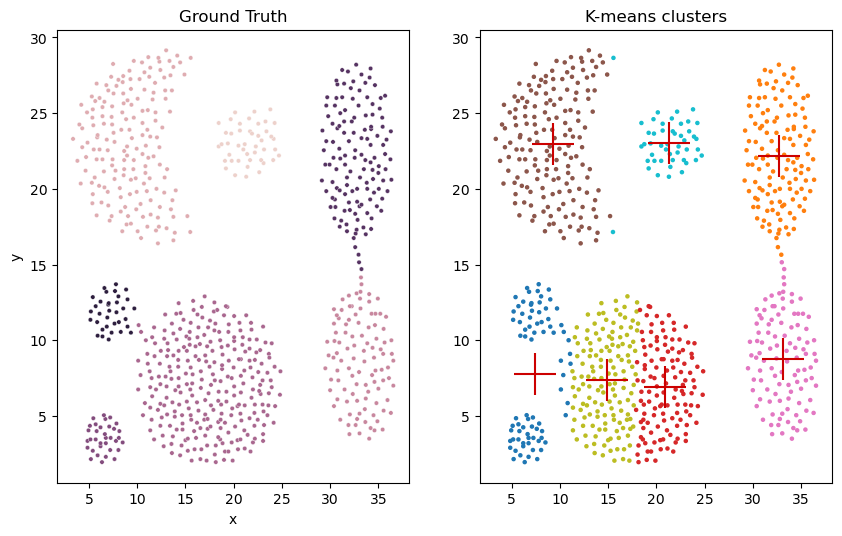

In [186]:
fig = plt.figure(figsize=(10,6), dpi=100)
ax1 = fig.add_subplot(121)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'class', legend=False, ax= ax1, s=10)
ax1.set_title("Ground Truth")

ax2 = fig.add_subplot(122)
ax2.scatter(df.x, df.y, cmap='tab10', s=5, c=kmeans.labels_)
ax2.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='+', lw=0, mew=1.5, ms=30, c='#cc0000')
ax2.set_title("K-means clusters")
plt.show()

## Agglomerative Clustering

In [187]:
ac = AgglomerativeClustering(linkage='average', n_clusters=7)
yhat = ac.fit_predict(df[['x', 'y']])

In [188]:
np.unique(yhat)

array([0, 1, 2, 3, 4, 5, 6])

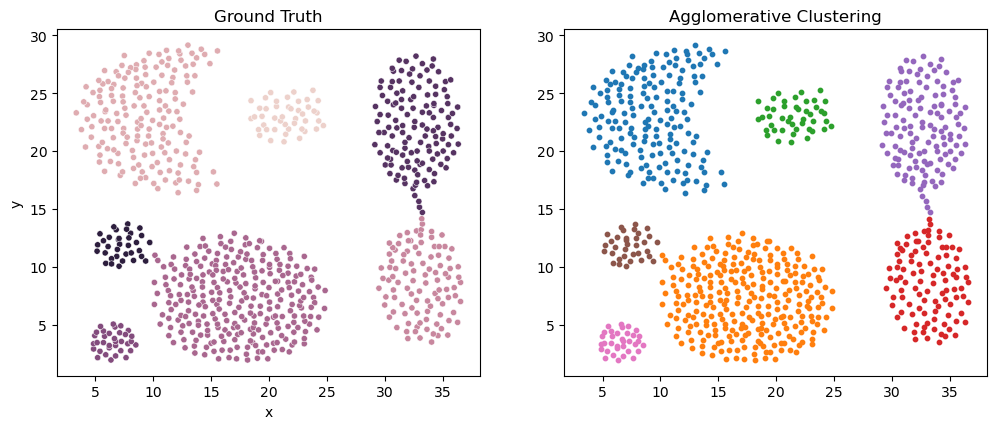

In [189]:
# Plot the dataset
fig = plt.figure(figsize=(12,5), dpi=100)
ax1 = fig.add_subplot(1,2,1, aspect=1.0)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'class', legend=False, ax= ax1, s=20)
ax1.set_title("Ground Truth")

ax3 = fig.add_subplot(1,2,2, aspect=1.0)
for c in np.unique(yhat):
    ax3.scatter(df.x[yhat==c], df.y[yhat==c], s=10)
ax3.set_title('Agglomerative Clustering')
plt.show()

## DBSCAN

In [209]:
dbs = DBSCAN(eps=1.21, min_samples=4)
yhat = dbs.fit_predict(df[['x', 'y']])

In [210]:
core_ = np.array([False] * len(yhat))
core_[dbs.core_sample_indices_] = True

In [211]:
noise_ = (yhat==-1)

In [212]:
border_ = np.logical_not(np.logical_or(noise_, core_))

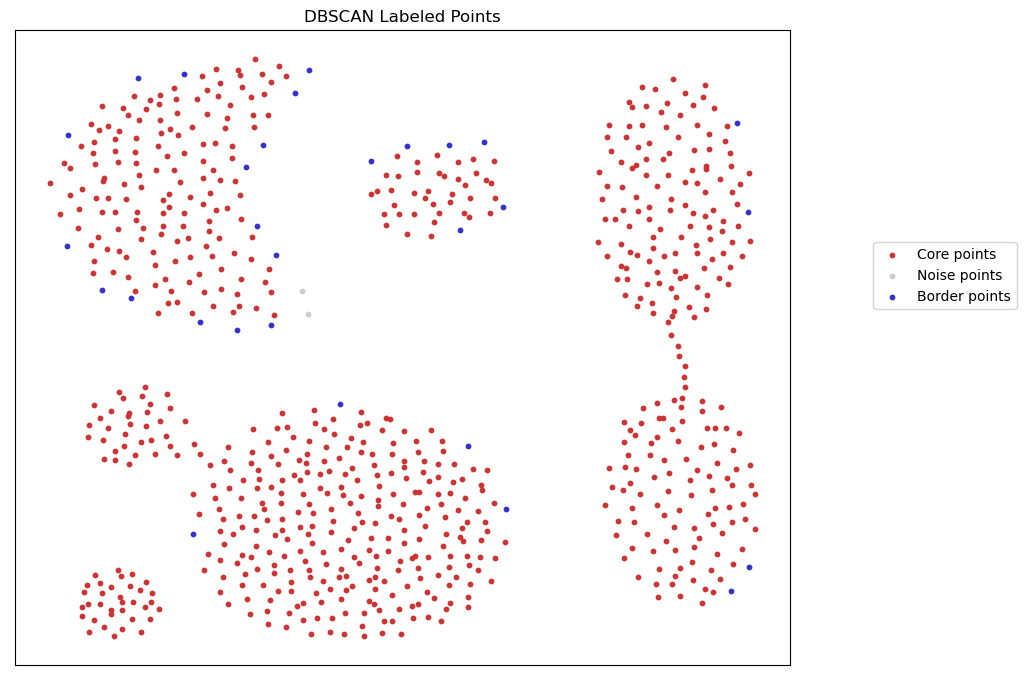

In [213]:
fig = plt.figure(figsize=(10,10), dpi=100)

# Plot the core, border, and noise points
ax2 = fig.add_subplot(111, aspect=1.0)
ax2.scatter(df.x[core_], df.y[core_], s=10, c='#CC3333', marker='o', label='Core points')
ax2.scatter(df.x[noise_], df.y[noise_], s=10, c='#CCCCCC', marker='o', label='Noise points')
ax2.scatter(df.x[border_], df.y[border_], s=10, c='#3333CC', marker='o', label='Border points')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.legend(loc='lower center', bbox_to_anchor=(1.2, 0.55))
ax2.set_title('DBSCAN Labeled Points')
plt.show()

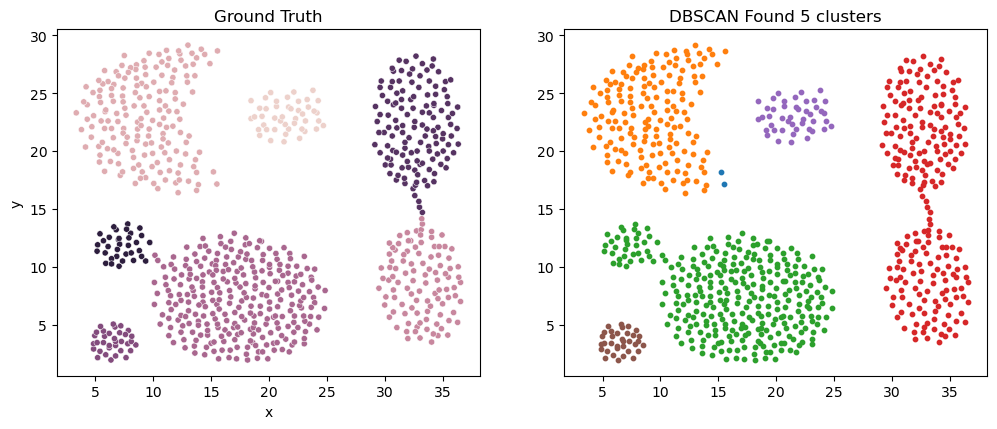

In [215]:
# How many clusters did we find?
unique, counts = np.unique(dbs.labels_, return_counts=True)
fig = plt.figure(figsize=(12,5), dpi=100)
ax1 = fig.add_subplot(1,2,1, aspect=1.0)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'class', legend=False, ax= ax1, s=20)
ax1.set_title("Ground Truth")

ax2 = fig.add_subplot(122, aspect=1.0)
# ax2.scatter(df.x, df.y, s=10, c=yhat, marker='o', cmap = 'hsv')
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_title('DBSCAN Found {} clusters'.format(len(unique)-1))
# plt.show()

for c in np.unique(yhat):
    ax2.scatter(df.x[yhat==c], df.y[yhat==c], s=10, label='Cluster {}'.format(c), cmap = 'hsv')
ax2.set_title('DBSCAN Found {} clusters'.format(len(unique)-1))
plt.show()

## Summary

In the dataset we have a total of 7 classes. The true classes show us that the cluster size is varying across clusters. 

1.So we see that K-means generated 7 clusters donot match with the ground truth as K-means performs poorly on clusters with different sizes. K-means is also sensitive to the centroids choosen. These are the reasons why k-means has performed poorly.

2.Agglomerative clustering was able to classify all points according to their class labels correctly. It gives 100% accuracy. Since the clusters in our data set are globular in nature, agglomerative clustering using group average prefers this and hence we have got perfect fit with this. Also, with group average, it is less susceptible to noise and outliers. 

3.DBSCAN returned 5 clusters and 1 cluster containing 2 noise data points. DBSCAN has identified two noise data points which was not present in the true class. Since DBSCAN finds non globular clusters too we see less number of clusters detected as now the cluster size is varying. 

Agglomerative clustering did the best job in finding the true clusters. It is difficult to conclude which algo did the worst as we are comparing apples and oranges in the case of K-means and DB-SCAN. For k-means we specified that the alog should find 7 clusters. Accordingly, it was able to find 4 out of 7 clusters correctly. DBSCAN on the other hand arrives at the number of clusters. While it found out 6 clusters(including noise cluster), only 3 of those clusters match the ground truth. The remaining two clusters are the combination of 2 individual clusters from ground truth.